**Classification Challange**

Università degli studi di Cassino e del Lazio Meridionale

Medical Imaging and Applications (MAIA)

Taiabur Rahman

Workflow 
1. Preprocessing
2. Feature selection
3. Training
4. Testing
5. Result

In [185]:
# import libraries and classes  
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [186]:
# Preprocess the data
def preprocess_data(df):
    X = df.iloc[:, 1:-1] # extract features (remove ID and Label)
    y = df.iloc[:, -1] # extract labels (last column)
    # Handle missing values, feature scaling, or feature selection as needed
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # scale the features

    # Map class labels to binary values
    label_mapping = {'AD': 1, 'MCI': 0}
    y = y.map(label_mapping)
    
    return X, y
# Preprocess the data
def preprocess_test_data(df):
    X = df.iloc[:, 1:] # extract features (remove ID)
    y = df.iloc[:,:] 
    # Handle missing values, feature scaling, or feature selection as needed
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # scale the features
    return X, y

# Split the train dataset into a training set and a validation set
def split_train_validation(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42)
    return X_train, X_val, y_train, y_val
def pro_pca(X):
    # Apply PCA
    pca = PCA(n_components=5)  # Specify the number of components to retain
    X_pca = pca.fit_transform(X)
    return X_pca
# Train a binary classification model using logistic regression
def train_logistic_regression(X_train, y_train, X_val, y_val):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    mcc = matthews_corrcoef(y_val, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc,mcc,balanced_accuracy
# Train a binary classification model using decision tree
def train_decision_tree(X_train, y_train, X_val, y_val):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

# Train a binary classification model using random forest
def train_random_forest(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    sensitivity = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

def train_svc(X_train_ADCTL, y_train_ADCTL,X_test_ADCTL,y_test_ADCTL):
    # Train the SVM model
    model = SVC()
    model.fit(X_train_ADCTL, y_train_ADCTL)

    # Predict on the test set
    y_pred = model.predict(X_test_ADCTL)
    # Evaluate the model
    accuracy = accuracy_score(y_test_ADCTL, y_pred)
    precision = precision_score(y_test_ADCTL, y_pred)
    sensitivity = recall_score(y_test_ADCTL, y_pred)
    f1 = f1_score(y_test_ADCTL, y_pred)
    roc_auc = roc_auc_score(y_test_ADCTL, y_pred)
    return model, accuracy, precision, sensitivity, f1, roc_auc

# Define a function to train and evaluate a model using cross-validation
def train_and_evaluate_model(model, X, y):
    # Perform 10-fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('pca', PCA(n_components=2)),  # Apply PCA with 2 components
    ('classifier', LogisticRegression())  # Logistic regression classifier
])

In [187]:
# import datasets
ADMCItrain_dataset=pd.read_csv("datasets/ADMCItrain.csv")
# import test datasets
ADMCItest_dataset=pd.read_csv("datasets/ADMCItest.csv")

In [188]:
ADMCItrain_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 172 non-null    object 
 1   Background                         172 non-null    float64
 2   Left-Superior-Frontal-Gyrus        172 non-null    float64
 3   Right-Superior-Frontal-Gyrus       172 non-null    float64
 4   Left-Middle-Frontal-Gyrus          172 non-null    float64
 5   Right-Middle-Frontal-Gyrus         172 non-null    float64
 6   Left-Inferior-Frontal-Gyrus        172 non-null    float64
 7   Right-Inferior-Frontal-Gyrus       172 non-null    float64
 8   Left-Precentral-Gyrus              172 non-null    float64
 9   Right-Precentral-Gyrus             172 non-null    float64
 10  Left-Middle-Orbitofrontal-Gyrus    172 non-null    float64
 11  Right-Middle-Orbitofrontal-Gyrus   172 non-null    float64

In [189]:
# Data preprocessing
ADMCI_x, ADMCI_y=preprocess_data(ADMCItrain_dataset)
print(ADMCItrain_dataset['Label'].value_counts())
ADMCIpca=pro_pca(ADMCI_x)
# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
pca_df = pd.DataFrame(data=ADMCIpca.round(4),)

# Save the DataFrame
pca_df.to_csv("0075718_Taiabur_ADMCIfeat.csv", index=False)


Label
MCI    90
AD     82
Name: count, dtype: int64


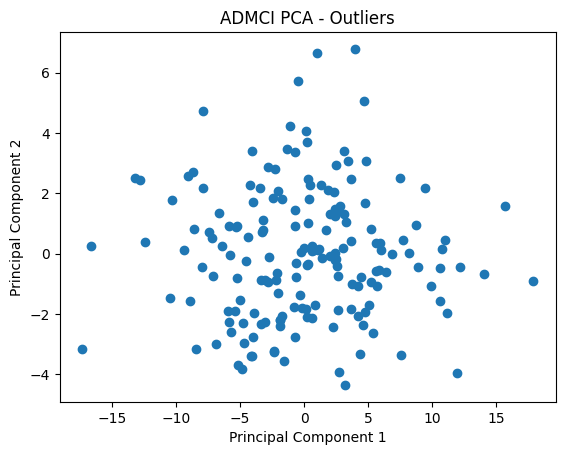

In [190]:
plt.scatter(ADMCIpca[:, 0], ADMCIpca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("ADMCI PCA - Outliers")
plt.show()

In [191]:
#Dataset split
ADMCI_train_x,ADMCI_val_x,ADMCI_train_y,ADMCI_label_y=split_train_validation(ADMCI_x, ADMCI_y)

In [192]:


model_logistic_reg, acc, prec, rec, f1, roc_auc,mcc,ba=train_logistic_regression(ADMCI_train_x,ADMCI_train_y,ADMCI_val_x,ADMCI_label_y)
print(model_logistic_reg, acc, prec, rec, f1, roc_auc,mcc,ba)

LogisticRegression_df=pd.DataFrame()
LogisticRegression_df['']=['ADvsMCI']
LogisticRegression_df['Accuracy']=[acc.round(4)]
LogisticRegression_df['Sensitivity']=[rec.round(4)]
LogisticRegression_df['Spec']=[0]
LogisticRegression_df['Precision']=[prec.round(4)]
LogisticRegression_df['F1']=[f1.round(4)]
LogisticRegression_df['AUC']=[roc_auc.round(4)]
LogisticRegression_df['MCC']=[mcc.round(4)]
LogisticRegression_df['BA']=[ba.round(4)]

print(LogisticRegression_df)
LogisticRegression_df.to_csv("ADMCI_TR_summary.csv",index=False)


LogisticRegression() 0.743801652892562 0.6885245901639344 0.7777777777777778 0.7304347826086957 0.7470978441127695 0.4913519574105358 0.7470978441127695
            Accuracy  Sensitivity  Spec  Precision      F1     AUC     MCC   
0  ADvsMCI    0.7438       0.7778     0     0.6885  0.7304  0.7471  0.4914  \

       BA  
0  0.7471  


In [193]:
ADMCI_test_x, ADMCI_test_y=preprocess_test_data(ADMCItest_dataset)
y_pred_ADMCI=model_logistic_reg.predict(ADMCI_test_x)
y_predict_proba_ADMCI=model_logistic_reg.predict_proba(ADMCI_test_x)

# Create a DataFrame to store the ID, predicted probabilities, and predicted labels
predictions_df = pd.DataFrame(data=y_predict_proba_ADMCI.round(4),columns=model_logistic_reg.classes_)
predictions_df["ID"] = ADMCItest_dataset["ID"]
predictions_df["test_data_predicted_Label"] = y_pred_ADMCI

# Save the DataFrame
predictions_df[["ID",0,1,"test_data_predicted_Label"]].to_csv("0075718_Taiabur_ADMCIres.csv", index=False)